In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

In [2]:
X, Y = make_regression(n_samples=500, n_features=15,n_informative=1, noise=7, bias=50, random_state=10)

n_samples, n_features= X.shape

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [3]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

print('Linear Regression coefficients: {}'.format(lm.coef_))
print('Linear Regression intercept: {}'.format(lm.intercept_))

y_train_predict = lm.predict(X_train)


b, m = np.polynomial.polynomial.polyfit(Y_train, y_train_predict, 1)

print("m = ", m)
print("b= ", b)

Linear Regression coefficients: [ 2.83005550e-02  1.01456403e-01 -5.79821458e-01 -7.07095120e-02
  2.79289678e-02  3.07294498e-01 -4.77608969e-01  3.27172121e-01
  8.63450033e-01 -4.16501825e-01 -3.43790050e-01 -5.04229831e-02
  4.63006977e+01 -1.16273731e-01  7.05688598e-01]
Linear Regression intercept: 49.91890389493611
m =  0.9753000227419867
b=  1.289446697257117


In [4]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(Y_train, y_train_predict)

r2 = r2_score(Y_train, y_train_predict)
 
print("The linear model performance for training set")
print('RMSE is {}'.format(rmse))

print('R2 score is {}'.format(r2))

The linear model performance for training set
RMSE is 55.219524934212885
R2 score is 0.9753000227419866


In [5]:
# r2 linear for test set 
# square error of the model
y_test_predict = lm.predict(X_test)
rmse = (mean_squared_error(Y_test, y_test_predict))
 
# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("\nThe linear model performance for testing set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2)) 


The linear model performance for testing set
RMSE is 48.944044143757736
R2 score is 0.9782023227620549


C:\Users\kade1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kade1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


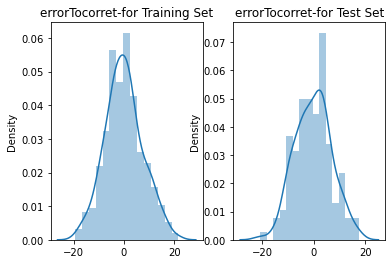

In [6]:
# linear bargraph 

y_train_residual = y_train_predict - Y_train
y_test_residual = y_test_predict - Y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual, bins=15)
plt.title('errorTocorret-for Training Set')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual, bins=15)
plt.title('errorTocorret-for Test Set')

plt.show()

In [7]:
 #evaluating the Ridge-model on train  data-set
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.01)
rr.fit(X_train, Y_train) 

pred_train_rr= rr.predict(X_train)
print("The Ridge model performance for the train dataset")

print("RMSE of test set is",np.sqrt(mean_squared_error(Y_train,pred_train_rr))) 
print("R2 score of test set is",r2_score(Y_train, pred_train_rr))

The Ridge model performance for the train dataset
RMSE of test set is 7.43098423510531
R2 score of test set is 0.9753000219510748


In [8]:
# evaluating the Ridge-model on test  data-set

from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, Y_train)
pred_test_rr= rr.predict(X_test)


print("RMSE of test set is",mean_squared_error(Y_test,pred_test_rr)) 
print("R2 score of test set is",r2_score(Y_test, pred_test_rr))


RMSE of test set is 48.944651856240654
R2 score of test set is 0.9782020521117483


C:\Users\kade1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kade1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


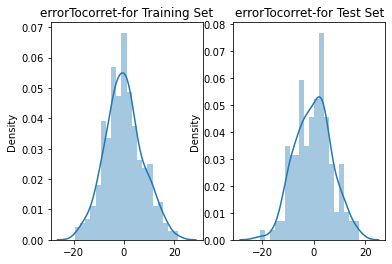

In [9]:
# bargraph for Ridge 
y_train_residual_rr = pred_train_rr - Y_train
y_test_residual_rr = pred_test_rr - Y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual_rr, bins=20)
plt.title('errorTocorret-for Training Set')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual_rr, bins=20)
plt.title('errorTocorret-for Test Set')

plt.show()

In [10]:
#ply-model
from sklearn.preprocessing import PolynomialFeatures
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=4)
   
X_train_poly = poly_features.fit_transform(X_train)
   
poly_model = LinearRegression()

poly_model.fit(X_train_poly, Y_train)
     
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
# train set
rmse_train = mean_squared_error(Y_train, y_train_predicted)
r2_train = r2_score(Y_train, y_train_predicted)
     
print("The polynomial model performance for the training set")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

The polynomial model performance for the training set
RMSE of training set is 7.992660425428052e-26
R2 score of training set is 1.0


In [11]:
# ply test 
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))
rmse_test = mean_squared_error(Y_test, y_test_predicted)
r2_test = r2_score(Y_test, y_test_predicted)

print("The polynomial model performance for the test set")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The polynomial model performance for the test set
RMSE of test set is 831.0252921118378
R2 score of test set is 0.6298952934739619


C:\Users\kade1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kade1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


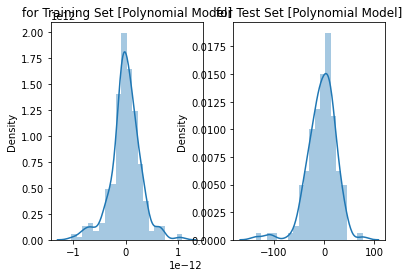

In [12]:
# bargraph for poly 
y_train_residual = y_train_predicted - Y_train
y_test_residual = y_test_predicted - Y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual, bins=20)
plt.title('for Training Set [Polynomial Model]')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual, bins=20)
plt.title('for Test Set [Polynomial Model]')

plt.show()

In [13]:
#Lasso Model 
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.03)
model_lasso.fit(X_train, Y_train) 
pred_train_lasso= model_lasso.predict(X_train)


b, m = np.polynomial.polynomial.polyfit(Y_train, pred_train_lasso, 1)

pred_test_lasso= model_lasso.predict(X_test)

In [14]:
#run training set 

print("RMSE of train set is",mean_squared_error(Y_train,pred_train_lasso))
print("R2 score of train set is",r2_score(Y_train, pred_train_lasso))

RMSE of train set is 55.23227784800806
R2 score of train set is 0.975294318298113


In [15]:
#run testing  set 

pred_test_lasso= model_lasso.predict(X_test)

print("RMSE of test set is",mean_squared_error(Y_test,pred_test_lasso))
print("R2 score of test set is",r2_score(Y_test, pred_test_lasso))

RMSE of test set is 48.57198337271385
R2 score of test set is 0.9783680234257821


C:\Users\kade1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kade1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


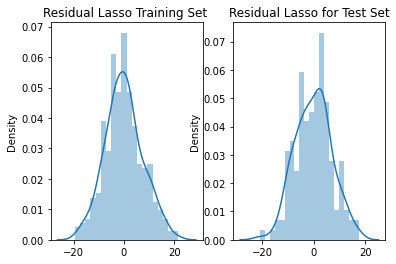

In [16]:
# bargraph for Lasso 

y_train_residual_Lasso1 = pred_train_lasso - Y_train
y_test_residual_Lasso1 = pred_test_lasso - Y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual_Lasso1, bins=20)
plt.title('Residual Lasso Training Set ')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual_Lasso1, bins=20)
plt.title('Residual Lasso for Test Set')

plt.show()